In [47]:
#3657c8H=
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [39]:
NUM_FEATURES = 2
NUM_ITER = 100
learning_rate = 0.1

W:[1.8127147 1.7589902]
b:[-2.9505813]
plot_y: [1.8835377  0.44077772]


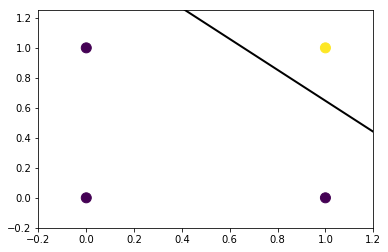

In [40]:
x = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], np.float32) # 4x2, input
y = np.array([0, 0, 1, 0], np.float32) # 4, correct output, AND operation
#y = np.array([0, 1, 1, 1], np.float32) # OR operation
 
W = np.zeros(NUM_FEATURES, np.float32) # 2x1, weight
b = np.zeros(1, np.float32) # 1x1
 
N, d = np.shape(x) # number of samples and number of features
 
# process each sample separately
for k in range(NUM_ITER):
   for j in range(N):
     yHat_j = x[j, :].dot(W) + b # 1x2, 2x1
     yHat_j = 1.0 / (1.0 + np.exp(-yHat_j))
 
     err = y[j] - yHat_j # error term
     deltaW = err * x[j, :]
     deltaB = err
     W = W + learning_rate * deltaW # if err = y - yHat, then W = W + lRate * deltW
     b = b + learning_rate * deltaB
 
# Now plot the fitted line. We need only two points to plot the line
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = - 1 / W[1] * (W[0] * plot_x + b) # comes from, w0*x + w1*y + b = 0 then y = (-1/w1) (w0*x + b)
 
print('W:' + str(W))
print('b:' + str(b))
print('plot_y: '+ str(plot_y))
 
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

W:[3.8348122 3.8344169]
b:[-5.950145]
plot_y: [1.7864611 0.3843605]


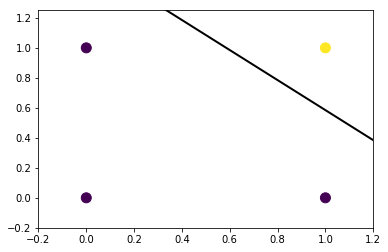

In [4]:
for k in range(NUM_ITER):
   yHat = x.dot(W) + b
   yHat = 1.0 / (1.0 + np.exp(-yHat))
 
   err = y - yHat
 
   deltaW = np.transpose(x).dot(err) # have to 2x1
   deltaB = np.sum(err) # have to 1x1. collect error from all the 4 samples
   W = W + learning_rate * deltaW # if err = y - yHat, then W = W + lRate * deltW
   b = b + learning_rate * deltaB
print('W:' + str(W))
print('b:' + str(b))
print('plot_y: '+ str(plot_y))
 
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

In [48]:
x = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], np.float32) # 4x2, input
y = np.array([0, 0, 1, 0], np.float32) # 4, correct output, AND operation
#y = np.array([0, 1, 1, 1], np.float32) # OR operation
y = np.reshape(y, [4,1]) # convert to 4x1
 
X = tf.placeholder(tf.float32, shape=[4, 2])
Y = tf.placeholder(tf.float32, shape=[4, 1])
 
W = tf.Variable(tf.zeros([NUM_FEATURES, 1]), tf.float32)
B = tf.Variable(tf.zeros([1, 1]), tf.float32)
 
yHat = tf.sigmoid( tf.add(tf.matmul(X, W), B) ) # 4x1
err = Y - yHat
deltaW = tf.matmul(tf.transpose(X), err ) # have to be 2x1
deltaB = tf.reduce_sum(err, 0) # 4, have to 1x1. sum all the biases? yes
W_ = W + learning_rate * deltaW
B_ = B + learning_rate * deltaB
 
step = tf.group(W.assign(W_), B.assign(B_)) #to update the values of weights and biases.
 
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
 
for k in range(NUM_ITER):
 sess.run([step], feed_dict={X: x, Y: y})
 
W = np.squeeze(sess.run(W))
b = np.squeeze(sess.run(B))
 
# Now plot the fitted line. We need only two points to plot the line
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = - 1 / W[1] * (W[0] * plot_x + b)
plot_y = np.reshape(plot_y, [2, -1])
plot_y = np.squeeze(plot_y)
 
print('W: ' + str(W))
print('b: ' + str(b))
print('plot_y: '+ str(plot_y))
 
#plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
plt.scatter (x [:, 0], x [:, 1], c = y.ravel (), s = 100, cmap = 'viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [52]:
!pip install tensorflow